<a href="https://colab.research.google.com/github/kezamamio/CpE-AIML/blob/main/58034_Lab05_TrashTakers/58034_Lab05_TrashTakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.1: Classification
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Another vital activity of Machine Learning is Classification. In this module we are going to understand the concepts and applications of classification in machine learning. In this module, we are going to discuss:
* Linear Classification
* Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Creating a Dataset
In Classification activities datasets should again include features and targets. The difference of the targets for classification from regression is that they are now categorical.A classification activity can either be working on a single class or multiple classes. Classification activities that are only categorizing single classes uses **Binary Classification** while those having multiple classes uses **Categorical Classification** or **Multi-class Classification**.

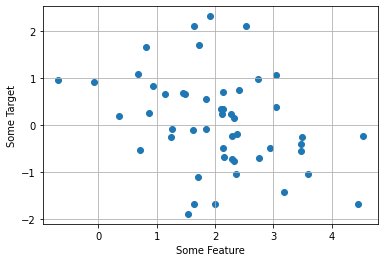

In [ ]:
### In thise example we will be creating a dummy dataset for a binary classifier

N = 100 ## total number of datapoints
cov = -0.30 ## covariance of X and y
center1 = np.array([2, 0]).T ## midpoint of the gaussian distribution
cov_mat1 = np.array([
                    [1,cov],
                    [cov,1]
])
np.random.seed(0)
dataset = np.array(np.random.multivariate_normal(center1,cov_mat1,int(N/2)))
## create a single two-variable gaussian distribution

plt.scatter(dataset[:,0],dataset[:,1])
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.grid()
plt.show()


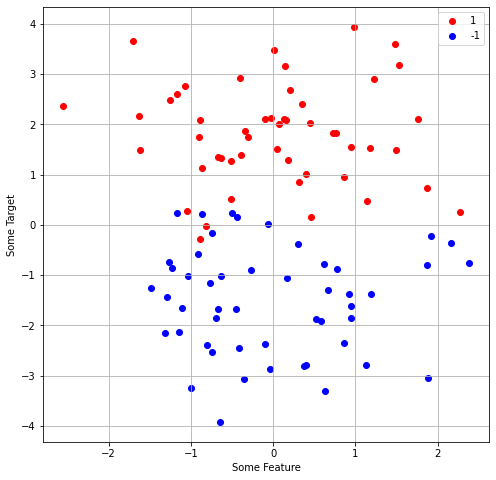

In [ ]:
## Now lets try to create two different distributions
## let's assume that each gaussian distribution is a class of its own
N = 100
cov = 0
center1 = np.array([0, 1.7]).T
cov_mat1 = np.array([
                    [1,cov],
                    [cov,1]
])

center2 = np.array([0, -1.7]).T
cov_mat2 = np.array([
                    [1,cov],
                    [cov,1]
])

np.random.seed(0)
X1 = np.array(np.random.multivariate_normal(center1,cov_mat1,int(N/2)))
X2 = np.array(np.random.multivariate_normal(center2,cov_mat2,int(N/2)))
## We'll declare another gaussian distribution with a different mean

plt.figure(figsize=(8,8))
plt.scatter(X1[:,0],X1[:,1], c='r', label='1')
plt.scatter(X2[:,0],X2[:,1], c='b', label='0')
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.legend()
plt.grid()
plt.show()

In [ ]:
### Label the datasets programmatically
X1 = np.append(X1,np.ones((X1.shape[0],1)),axis=1)
X2 = np.append(X2,np.zeros((X2.shape[0],1)),axis=1)

### Combine to a single dataset
X_train = np.vstack((X1,X2))
np.random.shuffle(X_train)

In [ ]:
def visualize(X):
  plt.figure(figsize=(8,8))
  color = ['red','blue']
  plt.scatter(X[:,0], X[:,1],c=X[:,2], cmap='jet')
  plt.xlabel('Feature')
  plt.ylabel('Target')

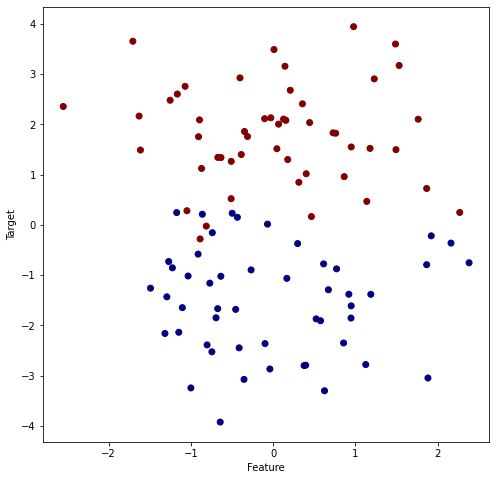

In [ ]:
visualize(X_train)

In [ ]:
### Creating a Binary Linear Classifier using Least Squares

## Set the data for the dataset
X = X_train[:,0:2]
X = np.hstack((X,np.ones((X_train.shape[0], 1))))
y = X_train[:,2].reshape(-1,1)

## Compute for the weights
pseudo_inv = np.linalg.inv(X.T @ X)
weights = pseudo_inv @ (X.T @ y)
weights

array([[0.00739642],
       [0.2192233 ],
       [0.46870667]])

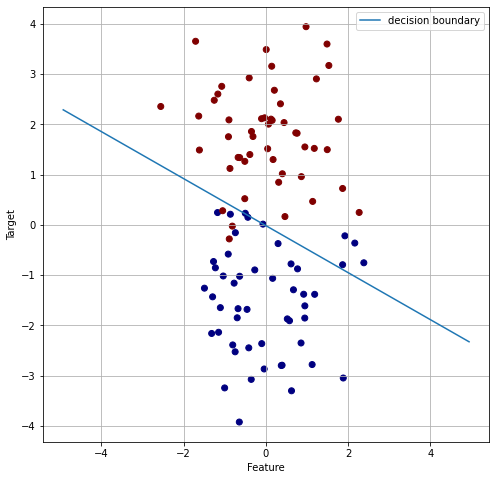

In [ ]:
## Visualize
def class_plot(X, y, weights):
  plt.figure(figsize=(8,8))

  xmin, xmax = X[:,1].min()-1, X[:,1].max()+1
  xaxis = np.linspace(xmin,xmax)
  yaxis = -weights[0]/weights[-1] - (weights[1]/weights[-1])*xaxis

  plt.scatter(X[:,0], X[:,1],c=y, cmap='jet')
  plt.plot(xaxis,yaxis, label='decision boundary') 

  plt.legend()
  plt.grid()
  plt.xlabel('Feature')
  plt.ylabel('Target')
  plt.show()  

class_plot(X,y,weights)

In [ ]:
## Create an inference instance to make predictions
infer = lambda X : np.round(X@weights)
X_test = np.array([0,2,1]) 
infer(X_test)

array([1.])

# Part 2: Metrics
Just like any machine learning activity we need to determine its measures of robustness and success. In this section we will be identifying the error and explainability of models. We will be implementing `sklearn` for determining the necessary metrics.

In [ ]:
from sklearn import metrics

## 2.1 Error
Just like in regression, we measure the robustness of a machine learning model. The most common loss function in classification by getting its vector norm. We generally formulate the vector norm as:
$$J = ((y-\hat{y})^N)^{-\frac{1}{N}}$$
Whereas $E$ is the norm or the cost of the model, $y$ is the targets, $\hat{y}$ are the predictions, and $N$ is the dimension of the distance. The most common norm is the Euclidean norm having $N=2$.

In [ ]:
### L2 Error
preds = infer(X)
residuals = y - preds
l2_error = np.sqrt(np.sum(np.square(residuals)))
l2_error

2.23606797749979

## 2.2 Explainability
Classification will use a different approach for determining the explainability since we are dealing with categorical predictions rather than continuous. Here we use:
* Accuracy
* Precision
* Recall
* F1-Score

In [ ]:
### Accuracy
accuracy = 1-np.mean(np.abs(residuals))
accuracy

0.95

In [ ]:
metrics.accuracy_score(y,preds)

0.95

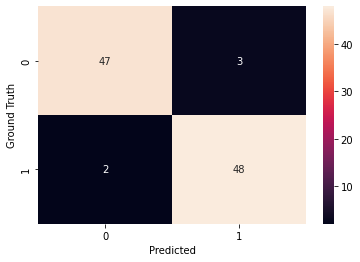

In [ ]:
### Confusion Matrix

conf_mat = confusion_matrix(y, preds)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

In [ ]:
conf_mat

array([[47,  3],
       [ 2, 48]])

In [ ]:
true_neg = conf_mat[0,0]
false_pos = conf_mat[0,1]
false_neg = conf_mat[1,0]
true_neg = conf_mat[1,1]

In [ ]:
## Precision
precision = true_pos/(true_pos+false_pos)
precision

0.94

In [ ]:
metrics.precision_score(y, preds)

0.9411764705882353

In [ ]:
## Recall
recall = true_pos/(true_pos+false_neg)
recall

0.9591836734693877

In [ ]:
metrics.recall_score(y,preds)

0.96

In [ ]:
## F1-Score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9494949494949495

In [ ]:
metrics.f1_score(y,preds)

0.9504950495049505

# Part 3: Logistic Regression
Logistic regression determines a relationship between predictor variables and a categorical target. Logistic regression can be used mainly in classification problems in machine learning where it determines the probability of an input being inclusive of a certain class or category. Logistic regression is mainly used in binary classification but it can be extended in multiple category classfication.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df_admit = pd.read_csv('/content/admitance-sats.csv')
df_admit.head(5)

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [ ]:
X = df_admit['SAT'].to_numpy().reshape((-1,1))
y = df_admit['Admitted'].to_numpy().reshape((-1,1))

In [ ]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = log_model.predict(X)

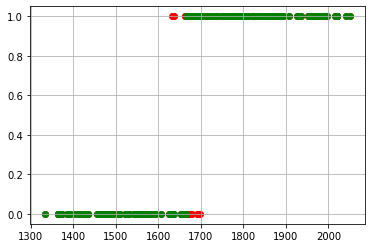

In [ ]:
plt.scatter(X,y, color='red')
plt.scatter(X,preds, color='green')
plt.grid()

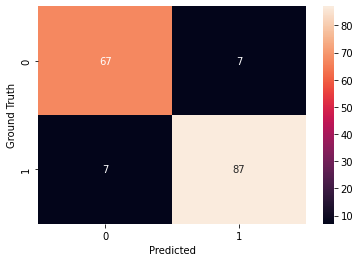

In [ ]:
conf_mat = metrics.confusion_matrix(y, preds)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

In [ ]:
class_metrics = {
    'accuracy': [metrics.accuracy_score(y, preds)],
    'precision': [metrics.precision_score(y, preds)],
    'recall': [metrics.recall_score(y,preds)],
    'f1-score': [metrics.f1_score(y, preds)]
}
pd.DataFrame(class_metrics)

,accuracy,precision,recall,f1-score
0,0.916667,0.925532,0.925532,0.925532


# Laboratory Activity

## Problem 1

* TrashTakers: [Insurance Dataset - Purpose, Needs Statement, and Significance](https://drive.google.com/file/d/1jv9ahJE7y3yEnNk3kCUEQYUulKtHSEgG/view?usp=sharing)


## Problem 2
* TrashTakers Algorithm: [Insurance Dataset - Algorithm](https://drive.google.com/file/d/17PFEd4xYzt0VKIq9qH_Fkkse7y8-Nv_K/view?usp=sharing)

## Solution 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
class LogistRegression():

  def train(self, X, y):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
  
  def predict(self, X):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
    self.preds = model.predict(X)
    return self.preds
    
  ## to indicate the value of m in slope formula
  def coefficients(self, X):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
    coefficient = model.coef_
    return coefficient
  
  ## to indicate the value of b in slope formula
  def intercepts(self, X):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
    intercept = model.intercept_
    return intercept

  def evaluate(self, X, y):
    preds = self.preds
    residuals = y - preds
    l2_error = np.sqrt(np.sum(np.square(residuals)))
    accuracy = metrics.accuracy_score(y,preds)
    precision = metrics.precision_score(y, preds)
    recall = metrics.recall_score(y,preds)
    F1 = metrics.f1_score(y,preds)
    eval_dict ={'Metrics':['L2 Error', 'Accuracy', 'Precision', 'Recall', 'F1 - Score',],
                'Values':[l2_error,accuracy,precision,recall,F1]
               }
    df = pd.DataFrame(eval_dict)
    return df

  def visualize(self,X,y):
    #scatter plot
    plt.figure(1)
    plt.scatter(X,y, color='red')
    plt.scatter(X,self.preds, color='green')
    plt.grid()

    #heatmap
    plt.figure(2)
    conf_mat = confusion_matrix(y, self.preds)
    sns.heatmap(conf_mat, annot=True)
    
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    plt.show()

In [ ]:
df = pd.read_csv("/content/insurance_data.csv")
X = df['age'].to_numpy().reshape((-1,1))
y = df['bought_insurance'].to_numpy()

In [ ]:
classification = LogistRegression()

In [ ]:
classification.train(X,y)

In [ ]:
classification.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [ ]:
classification.coefficients(X)

array([[0.05589224]])

In [ ]:
classification.intercepts(X)

array([-1.80953063])

In [ ]:
classification.evaluate(X,y)

,Metrics,Values
0,L2 Error,1.732051
1,Accuracy,0.888889
2,Precision,0.866667
3,Recall,0.928571
4,F1 - Score,0.896552


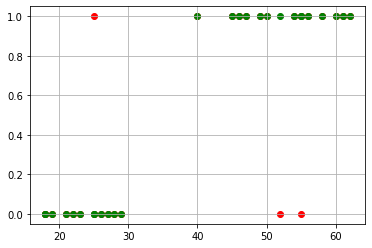

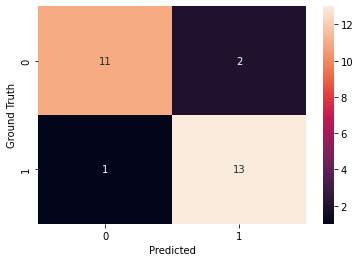

In [ ]:
classification.visualize(X,y)

## Application of the Prediction in the Dataset

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
  z = 0.042 * age - 1.81                                                # -1.80953063 ~ -1.81
  y = sigmoid(z)
  return y

In [ ]:
## Youngest age in the dataset
age = 22
prediction_function(age)

0.291935976213014

**0.29 is less than 0.5 which means person with age of 22 will not buy the insurance**

In [ ]:
## Oldest age in the dataset
age = 61
prediction_function(age)

0.6796143329051354

**0.68 is more than 0.5 which means person with age of 61 will buy the insurance**